# Classifying Galaxies, Stars, and Quasars

## Introduction

The Sloan Digital Sky Survey or SDSS is an imagery space research project conducted on a specific 2.5-meter wide-angle telescope located at the Apache Point Observatory in New Mexico (United States). The project aims to map a quarter of the visible sky, obtain observations about 100 million objects and the spectrum of one million objects. The survey includes spectral and photometric information on all detected astronomical objects, including stars, galaxies and quasars.

## Problem Statement : 

Using the photometric characteristics and the spectroscopic analysis of the redshift we can predict which of the 3 types of celestial objects has been captured by the telescope. An important point to note from the data set is that the classes are not balanced, that is, there are many more stars and galaxies than quasars.

## Feature Description :

The table results from a query which joins two tables:

"PhotoObj" which contains photometric data


"SpecObj" which contains spectral data.


16 variables (double) and 1 additional variable (char) 'class'.


A class object can be predicted from the other 16 variables.



##### Variables description:

objid = Object Identifier


ra = J2000 Right Ascension (r-band)


dec = J2000 Declination (r-band)


u = better of deV/Exp magnitude fit (u-band)


g = better of deV/Exp magnitude fit (g-band)


r = better of deV/Exp magnitude fit (r-band)


i = better of deV/Exp magnitude fit (i-band)


z = better of deV/Exp magnitude fit (z-band)


run = Run Number


rerun = Rerun Number


camcol = Camera column


field = Field number


specobjid = Object Identifier


class = object class (galaxy, star or quasar object)


redshift = Final Redshift


plate = plate number


mjd = MJD of observation


fiberid = fiberID

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
skydata = pd.read_csv('Skyserver.csv') #Loading the dataset

In [3]:
skydata.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
skydata.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

##### Target : Class
Class is our target variable which consist of Star, Galaxy and Quasar, lets take a look whats exactly the difference between them.

Star: A star is a luminous plasma spheroid that maintains its shape by its own gravity.

Galaxy: A galaxy is a set of stars, gas clouds, planets, cosmic dust, dark matter and energy gravitationally bound together in a more or less defined structure.

Quasar : It is an astronomical source of electromagnetic energy, which includes radio frequencies and visible light.

In [5]:
skydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Class is a catagorical type of data, so encoding is needed.

In [6]:
skydata.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no null values in our dataset.

In [7]:
skydata.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Some of these columns are here mostly for keeping track of the images such as objid and specobjid. Objid and Specobjid are made of the other features camcol, field, mjd, plate, fiberid, run, and rerun. These features are not really describe the star, galaxy, or quasar which means we can drop all of these features.

Also RA and DEC are just coordinates of the star/galaxy/quasar which means they are not actual features of these objects, that means we can drop them as well.

In [8]:
skydata_main = skydata.drop(columns=['objid', 'ra', 'dec','run', 'rerun', 'camcol','field', 'specobjid',
                                     'plate', 'mjd', 'fiberid'])
skydata_main

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590
...,...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583
9996,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772
9997,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402
9998,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019


Now I have 10000 rows and 7 columns are present in dataset I will be using the above data to train my model and getting predictions.

In [9]:
skydata_main.describe()

,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


1. From above statistical summary we can see that there are no missing values for any of the columns.

2. There is not much difference between mean and median.

In [10]:
skydata_main.nunique()

u           9730
g           9817
r           9852
i           9890
z           9896
class          3
redshift    9637
dtype: int64

Above are the unique values for each attribute of our dataset.

In [11]:
skydata_main['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

Class is divided into star, galaxy and quasars, above is value counts for the same.

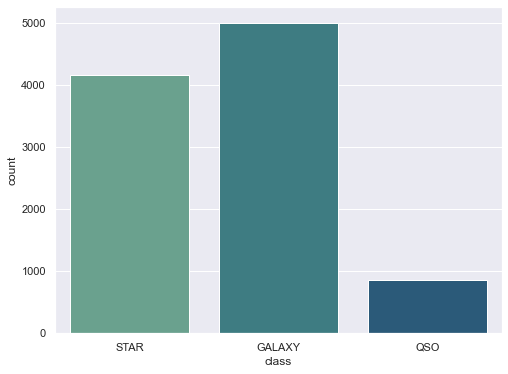

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x = skydata_main['class'], palette = 'crest')
plt.xlabel = 'Class'
plt.ylabel = 'Count'

As compare to Stars and Galaxy number of samples are less for Quasars. 

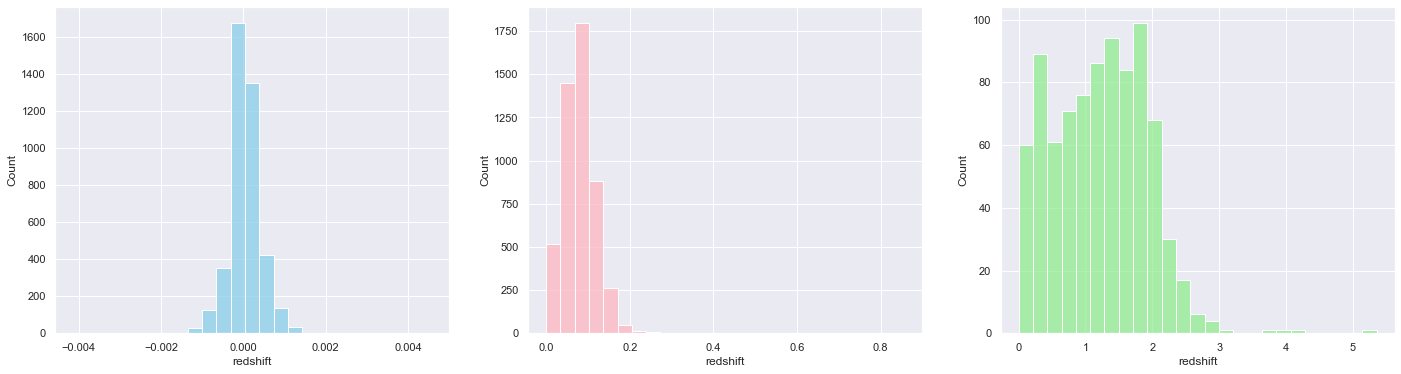

In [13]:
sns.set(style='darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(skydata_main[skydata_main['class'] == 'STAR'].redshift, ax = ax1, bins = 25, color = 'skyblue')
sns.histplot(skydata_main[skydata_main['class'] == 'GALAXY'].redshift, ax = ax2, bins = 25, color = 'lightpink')
sns.histplot(skydata_main[skydata_main['class'] == 'QSO'].redshift, ax = ax3, bins = 25, color = 'lightgreen')
# .set_xticklabels(labels="Stars")
plt.xlabel = 'redshift'
plt.ylabel = 'Density'

We observe that the values of the redshift of the stars are so low compared to the quasars.


Galaxies have a slightly higher redshift than stars, but much lower than quasars. There is a galaxy with a redshift = 1.08, but more than 99% of the galaxies have a redshift <0.3


There is a vast majority of the high values of the redshift correspond to quasars.

Text(0.5, 1.0, 'Stars')

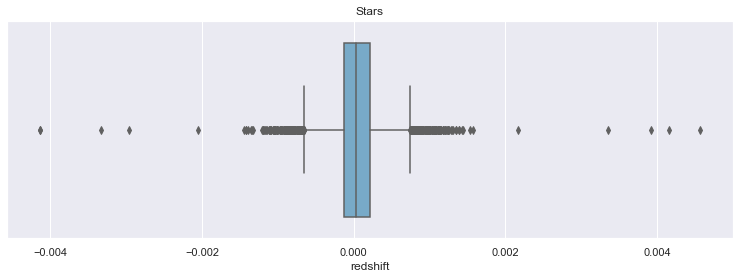

In [14]:
#Filter each class
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(13,4)

stars = skydata_main[skydata_main['class'] == 'STAR']
sns.boxplot(x = stars['redshift'], palette='Blues').set_title('Stars')


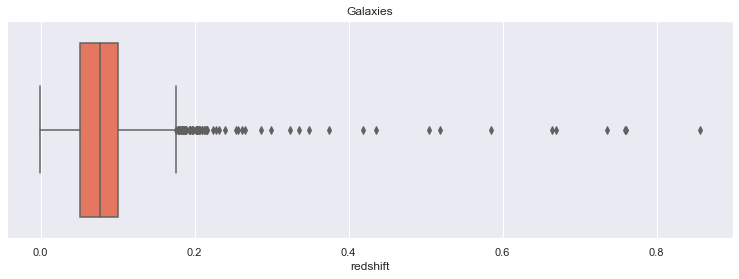

In [15]:
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(13,4)
galaxies = skydata_main[skydata_main['class'] == 'GALAXY']
sns.boxplot(x = galaxies['redshift'], palette = "Reds").set_title('Galaxies')
plt.show()





Text(0.5, 1.0, 'Quasars')

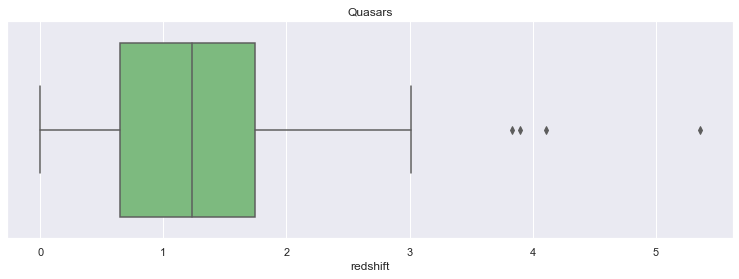

In [16]:
sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(13,4)
quasars = skydata_main[skydata_main['class'] == 'QSO']
sns.boxplot(x = quasars['redshift'], palette='Greens').set_title('Quasars')

Above plots shows the distribution of redshifts for each class and give us insight about the distance to each class. So this may be an important feature when classifying each object since the distribution of redshifts is different for each class.

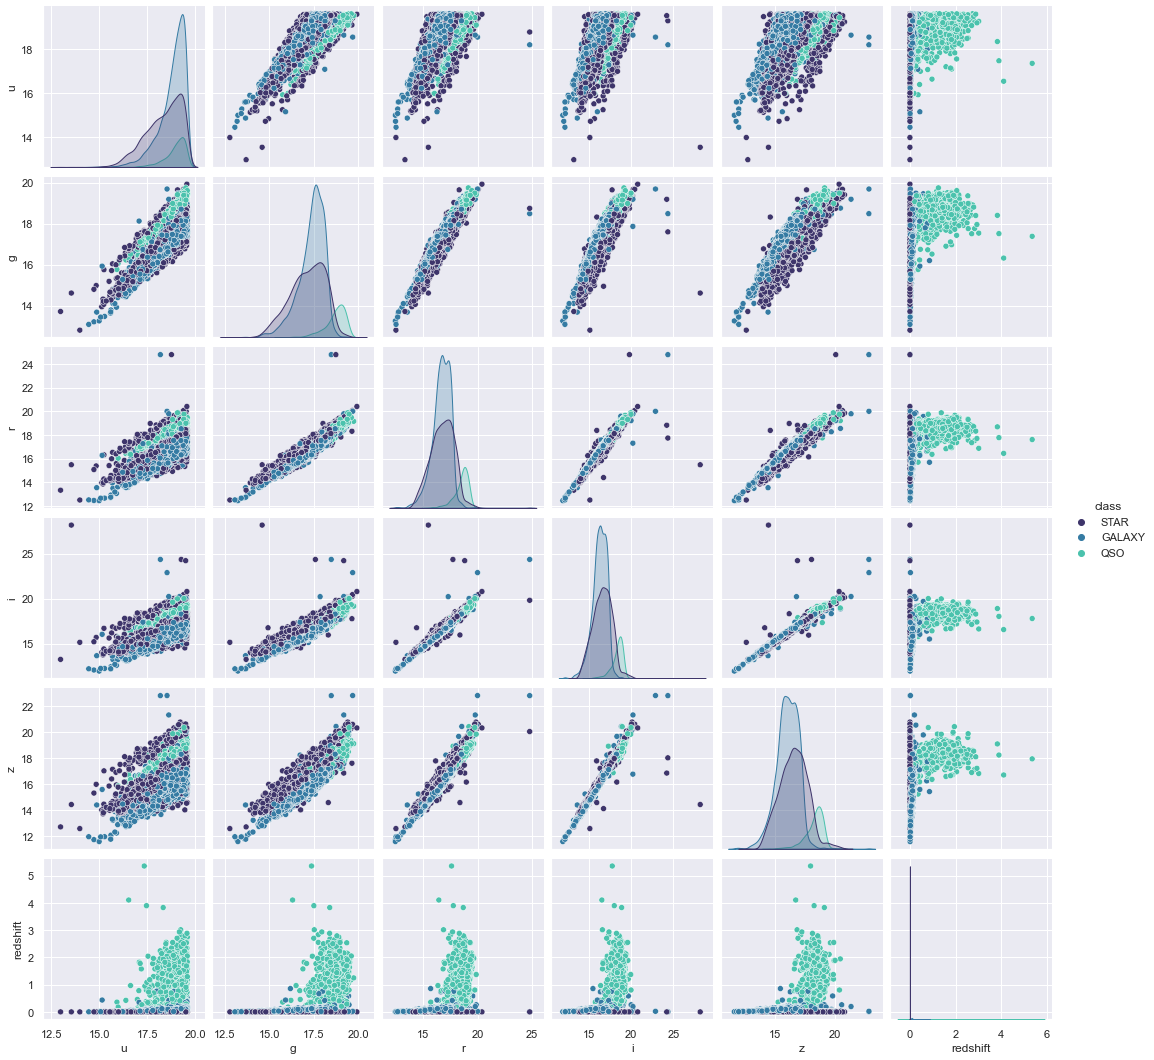

In [17]:
sns.set(style='darkgrid')
sns.pairplot(skydata_main, hue='class', kind='scatter', palette = 'mako')
plt.show()

In [18]:
skydata_main.corr()

,u,g,r,i,z,redshift
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000


<AxesSubplot:>

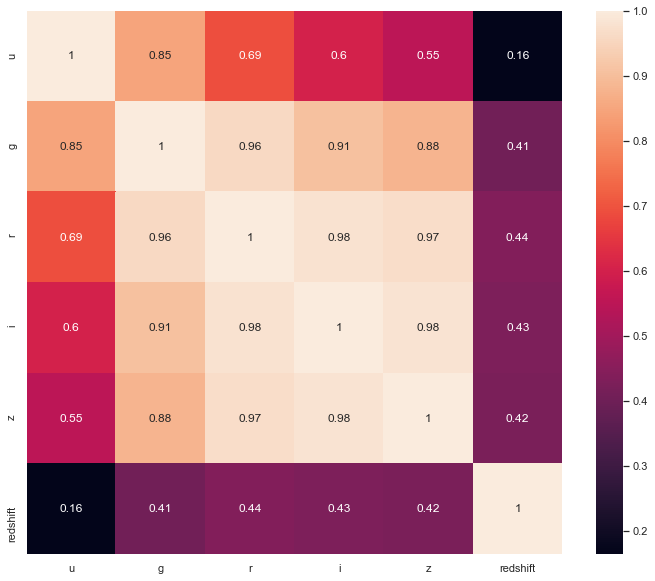

In [19]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
sns.heatmap(skydata_main.corr(), annot = True)

Heatmap of correlation shows that features g, r, i, z are highly correlating with redshift.

In [20]:
skydata_main.head(5)

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


## Data Preprossesing

In [21]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
#avocado["type"]=LabelEncoder.fit_transform(avocado["type"])
skydata_main['class']=LabelEncoder.fit_transform(skydata_main['class'])
skydata_main['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

Convertin class from catagorical to numeric form

In [22]:
skydata_main.dtypes

u           float64
g           float64
r           float64
i           float64
z           float64
class         int32
redshift    float64
dtype: object

## Training The Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler

In [24]:
X_skydata = skydata_main.drop('class', axis=1)


In [25]:
X_skydata

,u,g,r,i,z,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590
...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583
9996,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772
9997,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402
9998,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019


In [26]:
y_skydata = skydata_main['class']

In [27]:
y_skydata

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_skydata, y_skydata, test_size=0.35, random_state=0,stratify=y_skydata)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6500, 6), (3500, 6), (6500,), (3500,))

## Scaling the Data (Standardization)

In [30]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

#fit_transform will first perform fit and calculates the parameters, then applies transform 
X_train = standard_scaler.fit_transform(X_train)

#just need to transform since fit was already called
X_test = standard_scaler.transform(X_test)

## Selecting the best Model



In [31]:
model = [LinearRegression(), DecisionTreeRegressor(), SVR(), Ridge(), 
         LogisticRegression(max_iter = 250), RandomForestRegressor()]
for m in model:
    m.fit(X_train, y_train)
    print("Score Of",m,"is : ",m.score(X_test, y_test),'\n')
    predict_m = m.predict(X_test)
    print("Errors : \n")
    print("Mean Absolute Error : ", mean_absolute_error(y_test,predict_m))
    print("Mean Squared Error : ", mean_squared_error(y_test, predict_m))
    print("R2 Score : ", r2_score(y_test, predict_m))
    print("\n********************************************************************************\n")
    

Score Of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is :  0.497776400193074 

Errors : 

Mean Absolute Error :  0.5563724990916576
Mean Squared Error :  0.4558707804175947
R2 Score :  0.497776400193074

********************************************************************************

Score Of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is :  0.9795402335237275 

Errors : 

Mean Absolute Error :  0.015714285714285715
Mean Squared Error :  0.018571428571428572
R2 Score :  0.9795402335237275

********************************************************************************

Score Of SVR(C=1.0, cache_siz

## Cross Validation of The Models

In [32]:
from sklearn.model_selection import cross_val_score
model = [LinearRegression(), DecisionTreeRegressor(), SVR(), Ridge(), 
         LogisticRegression(max_iter = 250), RandomForestRegressor()]
for m in model:
    score = cross_val_score(m,X_train,y_train,cv=4,scoring='r2')
    print("Score of",m," : \n\nScore :",score)
    print("Mean Score : ", score.mean())
    print("standerd Daviation : ", score.std())
    print("\n*****************************************************************************\n")

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  : 

Score : [0.4827439  0.50891135 0.48828186 0.48333592]
Mean Score :  0.49081825841631344
standerd Daviation :  0.010665059303005917

*****************************************************************************

Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  : 

Score : [0.98561432 0.97363883 0.98125949 0.98837955]
Mean Score :  0.9822230462196615
standerd Daviation :  0.005568223683727081

*****************************************************************************

Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 

Random Forest Regresor is giving high accuracy among all the models so we will choose Random Forest as our best model for predicting the best results.

## Random Forest Regressor

In [33]:
rfr = RandomForestRegressor(n_estimators=85,random_state=42)
rfr.fit(X_train,y_train)
#print("\n********************************************************************************\n")
print("\nScore : ",rfr.score(X_test, y_test),'\n')
predict_rfr = rfr.predict(X_test)
print("Errors : \n")
print("Mean Absolute Error : ", mean_absolute_error(y_test,predict_rfr))
print("Mean Squared Error : ", mean_squared_error(y_test, predict_rfr))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, predict_rfr)))
print("R2 Score : ", r2_score(y_test, predict_rfr))
print("\n********************************************************************************\n")
    


Score :  0.9843304219583278 

Errors : 

Mean Absolute Error :  0.0195327731092437
Mean Squared Error :  0.01422335145823035
Root Mean Squared Error :  0.1192616931719081
R2 Score :  0.9843304219583278

********************************************************************************



### Cross Validation Score for Random Forest Regressor

In [34]:
score = cross_val_score(rfr,X_train,y_train,cv=4,scoring='r2')
print("\nScore :",score)
print("Mean Score : ", score.mean())
print("Standerd Daviation : ", score.std())


Score : [0.99296706 0.9843704  0.98514905 0.99080449]
Mean Score :  0.988322752683388
Standerd Daviation :  0.003654520225897754


The mean score of Random Forest Regressor is 0.98, now we will save its pkl file by doing serialization

### Serialization

In [35]:
import joblib
joblib.dump(rfr,"Space_Survay_rfr.pkl")

['Space_Survay_rfr.pkl']